## Linear Regression using the Boston Hosuing Dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
%matplotlib inline

In [4]:
from sklearn.datasets import load_boston

In [5]:
boston=load_boston()

In [6]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [7]:
boston['data'][1:3]

array([[  2.73100000e-02,   0.00000000e+00,   7.07000000e+00,
          0.00000000e+00,   4.69000000e-01,   6.42100000e+00,
          7.89000000e+01,   4.96710000e+00,   2.00000000e+00,
          2.42000000e+02,   1.78000000e+01,   3.96900000e+02,
          9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00,
          0.00000000e+00,   4.69000000e-01,   7.18500000e+00,
          6.11000000e+01,   4.96710000e+00,   2.00000000e+00,
          2.42000000e+02,   1.78000000e+01,   3.92830000e+02,
          4.03000000e+00]])

In [8]:
boston['target'][1:10]

array([ 21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,  18.9])

In [9]:
boston['feature_names'][:]

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7')

In [10]:
print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [11]:
boston_data = np.array( boston['data']) 

In [12]:
boston_data_pd = pd.DataFrame(data= boston['data'], columns = boston['feature_names'])

In [13]:
boston_data_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
boston_data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [15]:
boston_data_pd.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [16]:
boston_data_pd.columns[:]

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

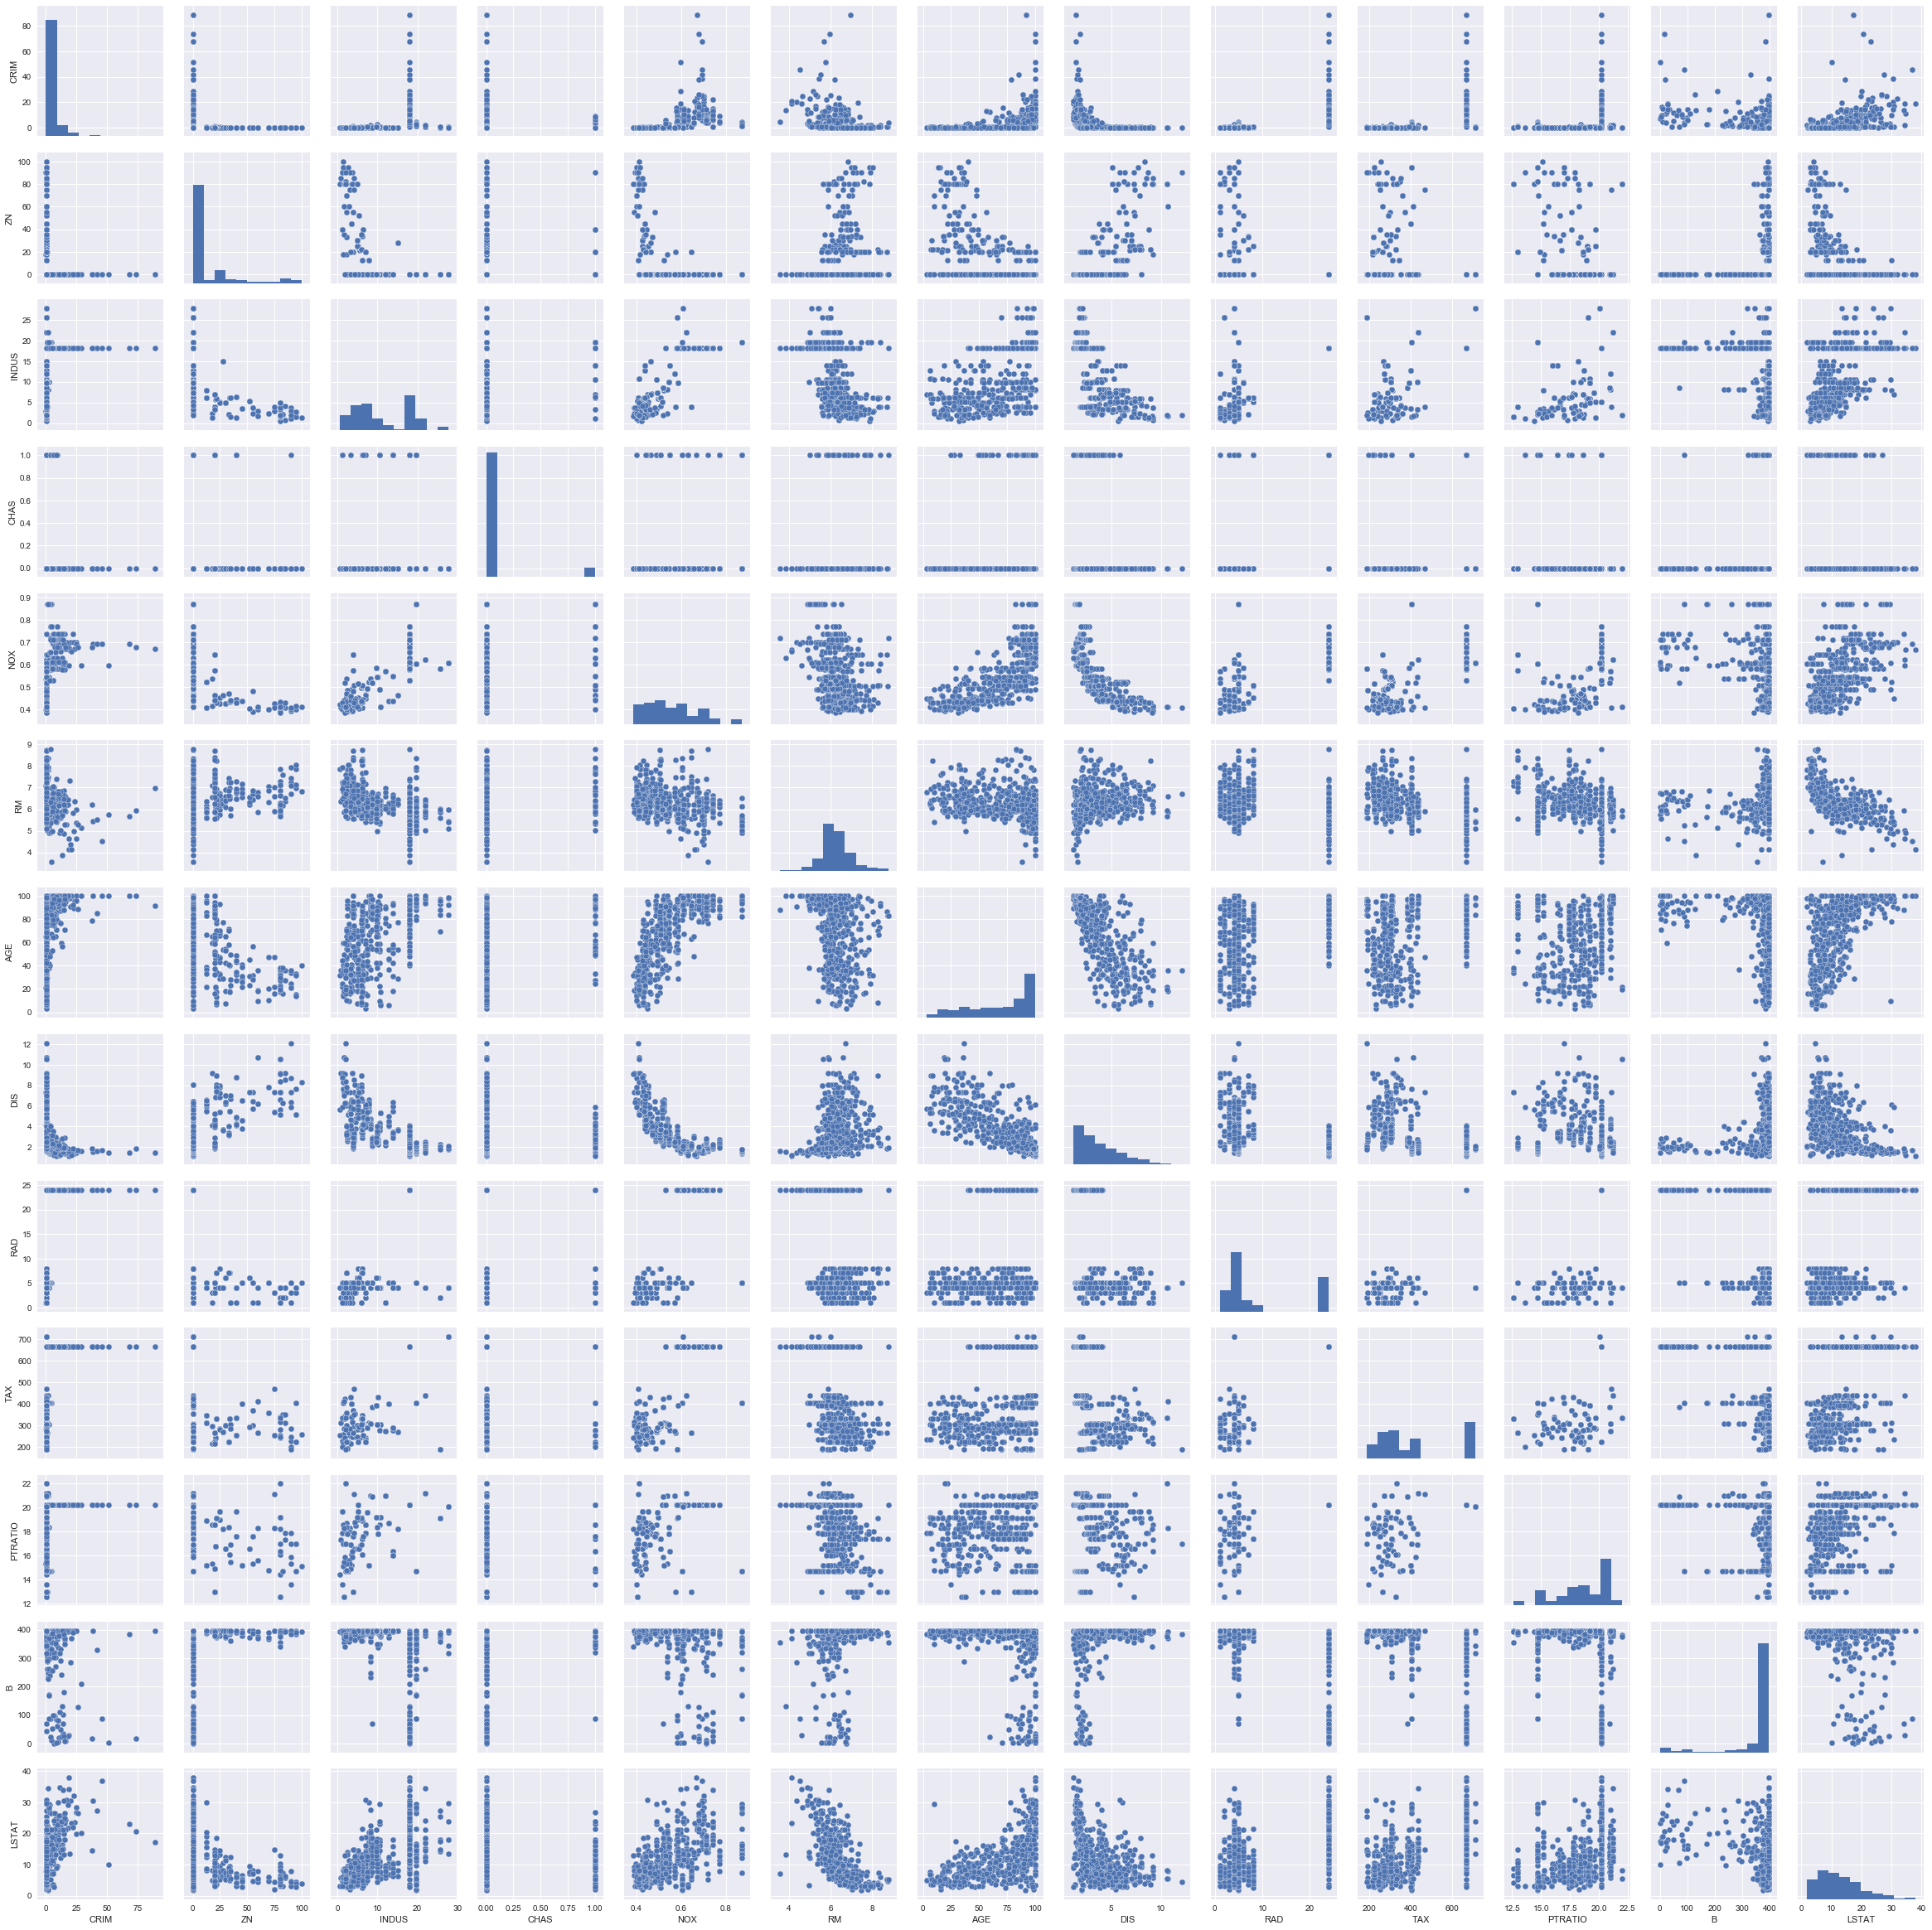

In [17]:
sns.pairplot(boston_data_pd)

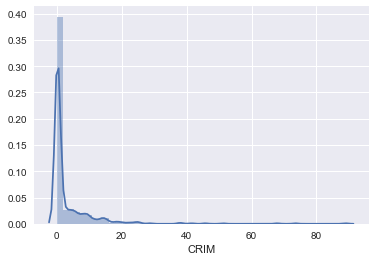

In [18]:
sns.distplot(boston_data_pd['CRIM'])


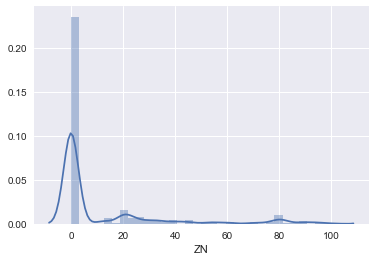

In [19]:
sns.distplot(boston_data_pd['ZN'])


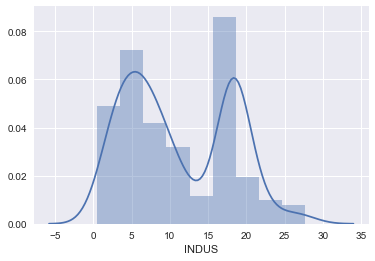

In [20]:
sns.distplot(boston_data_pd['INDUS'])


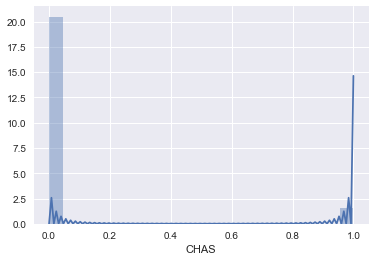

In [21]:
sns.distplot(boston_data_pd['CHAS'])


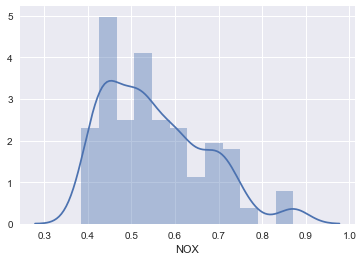

In [22]:
sns.distplot(boston_data_pd['NOX'])


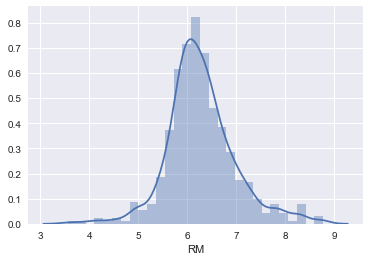

In [23]:
sns.distplot(boston_data_pd['RM'])


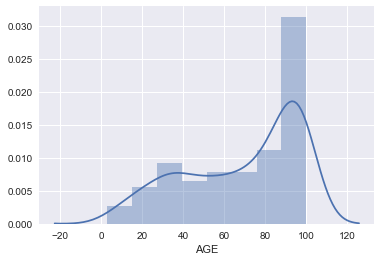

In [24]:
sns.distplot(boston_data_pd['AGE'])


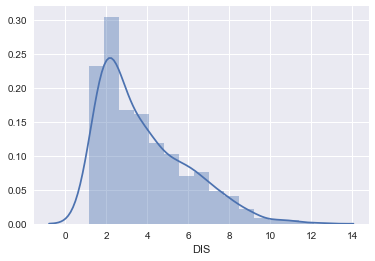

In [25]:
sns.distplot(boston_data_pd['DIS'])


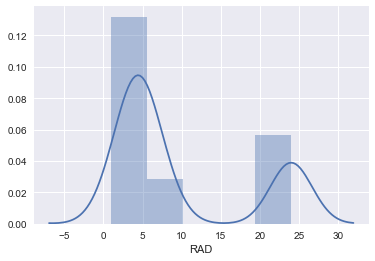

In [26]:
sns.distplot(boston_data_pd['RAD'])


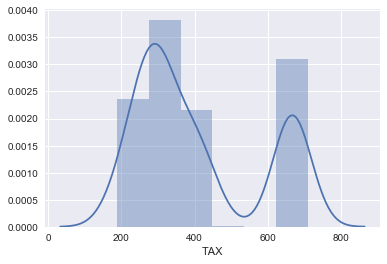

In [27]:
sns.distplot(boston_data_pd['TAX'])


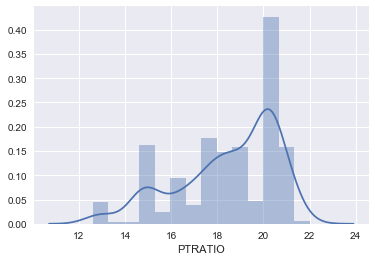

In [28]:
sns.distplot(boston_data_pd['PTRATIO'])


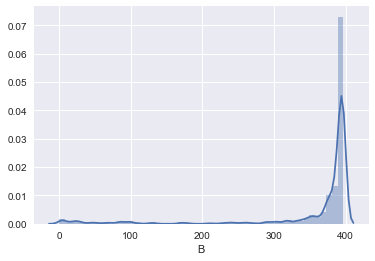

In [29]:
sns.distplot(boston_data_pd['B'])

## Split the data 

In [36]:
X = boston_data_pd
#df.drop(    'Price',axis=1)
#X = df.drop('Address',axis=1)

X.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [37]:
Y = pd.DataFrame(boston['target'])
Y.head(2)

,0
0,24.0
1,21.6


##### Perform the Train Test Split

In [38]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=101)

###### Create the Linear Regrssion Model

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lm = LinearRegression()

In [41]:
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
lm.intercept_

array([ 40.26605124])

In [43]:
lm.coef_[0]

array([ -8.74917163e-02,   5.02793747e-02,   2.06785359e-02,
         3.75457604e+00,  -1.77933846e+01,   3.24118660e+00,
         1.20902568e-02,  -1.40965453e+00,   2.63476633e-01,
        -1.03376395e-02,  -9.52633123e-01,   6.20783942e-03,
        -5.97955998e-01])

In [44]:
coef = pd.DataFrame(lm.coef_[0],X.columns,columns=['Coeff'])
                    

In [45]:
coef

,Coeff
CRIM,-0.087492
ZN,0.050279
INDUS,0.020679
CHAS,3.754576
NOX,-17.793385
RM,3.241187
AGE,0.012090
DIS,-1.409655
RAD,0.263477
TAX,-0.010338


### Predict the values on the test set.

In [46]:
prediction= lm.predict(X_test)

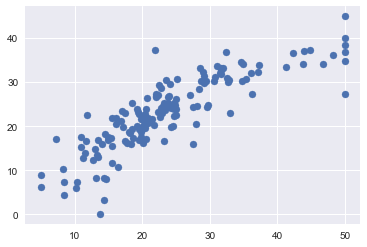

In [47]:
plt.scatter(Y_test,prediction)

### Plot the residuals

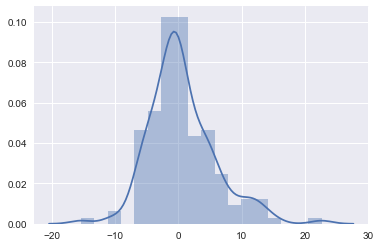

In [48]:
sns.distplot((Y_test-prediction))

#### Quality Metrices

In [49]:
from sklearn import metrics 

In [50]:
 matx = metrics.mean_absolute_error(Y_test,prediction) 

In [51]:
np.sqrt(matx)

1.9587057302535007